# 拟合

## 多项式拟合 numpy.polynomial

[ 0.08138754 -3.38174606 -0.40298685  5.58384396  0.35245668 -2.4820491 ]


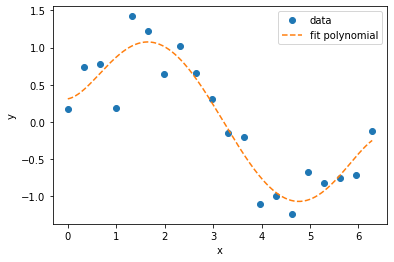

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial as P 


rng = np.random.default_rng(1)
x = np.linspace(0, 2*np.pi, 20)
y = np.sin(x) + rng.normal(scale=0.5, size=x.shape)
p = P.fit(x, y, deg=5) # 次数
print(p.coef)

plt.plot(x, y, 'o', label='data')
xx = np.linspace(0, 2*np.pi, 200)
plt.plot(xx, p(xx), '--', label='fit polynomial')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## 函数拟合 scipy.optimize.curve_fit

返回值

- popt: 最小二乘拟合得到参数
- pcov: 协方差矩阵，其中np.sqrt(np.diag(pcov))为标准差

[2.60437976 1.33487461 0.48456861]
[[ 0.01160596  0.00478154 -0.00057784]
 [ 0.00478154  0.01401482  0.00394553]
 [-0.00057784  0.00394553  0.00212948]]
[2.4936018  1.         0.36144807]
[[ 0.01155931  0.00216026 -0.00169733]
 [ 0.00216026  0.01217232  0.00623147]
 [-0.00169733  0.00623147  0.00467355]]


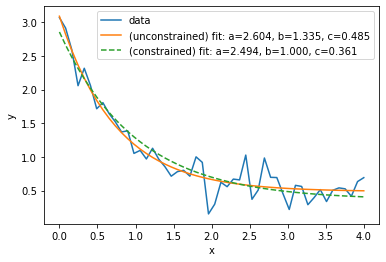

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


def f(x, a, b, c):
    return a * np.exp(-b*x) + c

xdata = np.linspace(0, 4, 50)
y = f(xdata, 2.5, 1.3, 0.5) # 待拟合函数
rng = np.random.default_rng(1)
ydata = y + 0.2 * rng.normal(size=xdata.size) # 加入噪点
plt.plot(xdata, ydata, '-', label='data')

popt, pcov = curve_fit(f, xdata, ydata) # 拟合参数值， 协方差矩阵
print(popt, pcov, sep='\n')
plt.plot(xdata, f(xdata, *popt), '-',
         label='(unconstrained) fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

popt, pcov = curve_fit(f, xdata, ydata, bounds=(0, [3., 1., 0.5]))
print(popt, pcov, sep='\n')
plt.plot(xdata, f(xdata, *popt), '--',
         label='(constrained) fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# 插值

## 1-D 样条scipy.interpolate.interp1d

参数

- kind:  ‘linear’, **‘nearest’**, ‘nearest-up’, ‘zero’, **‘slinear’, ‘quadratic’, ‘cubic’**, **‘previous’, ‘next’**

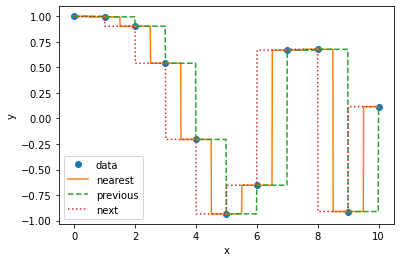

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d


x = np.linspace(0, 10, 11, endpoint=True)
y = np.cos(-x**2/9.0)
f1 = interp1d(x, y, kind='nearest')
f2 = interp1d(x, y, kind='previous')
f3 = interp1d(x, y, kind='next')

xx = np.linspace(0, 10, 1001, endpoint=True)
plt.plot(x, y, 'o', label='data')
plt.plot(xx, f1(xx), '-', label='nearest')
plt.plot(xx, f2(xx), '--', label='previous')
plt.plot(xx, f3(xx), ':', label='next')

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

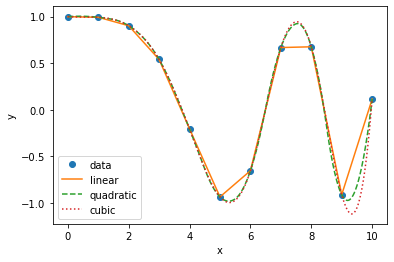

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d


x = np.linspace(0, 10, 11, endpoint=True)
y = np.cos(-x**2/9.0)
f4 = interp1d(x, y, kind='linear')
f5 = interp1d(x, y, kind='quadratic')
f6 = interp1d(x, y, kind='cubic')

xx = np.linspace(0, 10, 1001, endpoint=True)
plt.plot(x, y, 'o', label='data')
plt.plot(xx, f4(xx), '-', label='linear')
plt.plot(xx, f5(xx), '--', label='quadratic')
plt.plot(xx, f6(xx), ':', label='cubic')

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## $\bigstar$ 1-D B-样条scipy.interpolate.splXXX

- splrep(x, y, **args) B样条插值曲线
  - 1 <= k <= 5为曲线次数，默认为3
  - 用作插值时s=0

- splev(x, tck, der=0) 求样条函数值和导数值
- spalde(x, tck) 求所有阶导数值
- splint(a, b, tck) 求积分

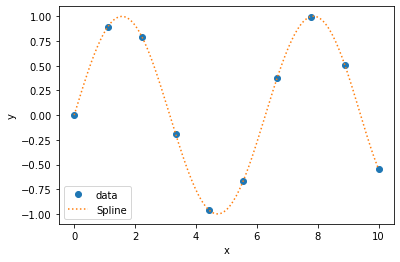

(array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         2.77777778,  3.88888889,  5.        ,  6.11111111,  7.22222222,
        10.        , 10.        , 10.        , 10.        , 10.        ]),
 array([-1.89236735e-17,  6.90320320e-01,  1.72461382e+00,  1.27946399e-01,
        -1.24946743e+00, -8.63350359e-01,  9.94878039e-01,  1.57798513e+00,
        -3.51965718e-02, -5.44021111e-01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]),
 4)

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import splev, splrep, splint, spalde


x = np.linspace(0, 10, 10)
y = np.sin(x)
spl = splrep(x, y, k=4) # 三次样条

xx = np.linspace(0, 10, 200)
plt.plot(x, y, 'o', label='data')
# plt.plot(xx, np.sin(xx), '--', label='True')
plt.plot(xx, splev(xx, spl, der=0), ':', label='Spline')

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

spl

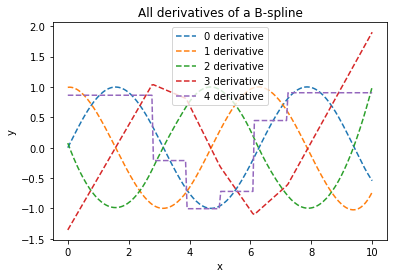

In [14]:
yders = spalde(xx, spl)
plt.figure()
for i in range(len(yders[0])):
   plt.plot(xx, [d[i] for d in yders], '--', label=f"{i} derivative")
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('All derivatives of a B-spline')
plt.show()

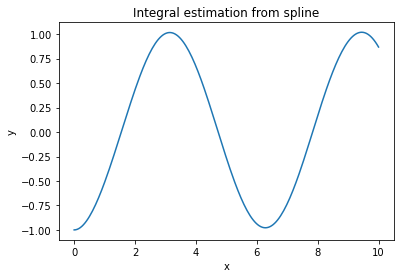

In [7]:
def integ(x, tck, constant=-1):
    x = np.atleast_1d(x)
    out = np.zeros(x.shape, dtype=x.dtype)
    for n in range(len(out)):
        out[n] = splint(0, x[n], tck)
    out += constant
    return out
plt.plot(xx, integ(xx, spl), '-')
plt.title('Integral estimation from spline')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

---

## 参考资料.

- [Interpolation (scipy.interpolate) — SciPy v1.9.0 Manual](https://docs.scipy.org/doc/scipy/tutorial/interpolate.html)
- [scipy.optimize.curve_fit — SciPy v1.9.0 Manual](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html?highlight=curve_fit#scipy.optimize.curve_fit)
- [Convenience Classes — NumPy v1.23 Manual](https://numpy.org/doc/stable/reference/routines.polynomials.package.html?highlight=polynomial#module-numpy.polynomial)